Justification for why we chose VGG Architecture as our State-of-the-art Model

In [ ]:
# For this model we used VGG16
# VGG16 architecture is a pre-trained deep convolutional neural network (CNN) designed for image classification tasks
# which saves time on model training and optimization.
# It also returns highly accurate image classification results because of its architecture and amount of layers.

Loading the dataset through Kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d gpiosenka/100-bird-species

100% 1.95G/1.96G [00:17<00:00, 206MB/s]
100% 1.96G/1.96G [00:17<00:00, 117MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/100-bird-species.zip', 'r')
zip_ref.extractall('/data')
zip_ref.close()

Importing necessary libraries

In [20]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Setting image size and path to each folder in the data

In [21]:
IMAGE_SIZE = [224, 224]

In [22]:
train_directory='/data/train'
test_directory='/data/test'
val_directory='/data/valid'

In [23]:
# VGG16 architecture is a pre-trained deep convolutional neural network (CNN) designed for image classification tasks
# which saves time on model training and optimization.
# It also returns highly accurate image classification results because of its architecture and amount of layers.

In [24]:
# Add preprocessing layer to the front of VGG
# (input shape, number of channels, weights, use all layers except last layer "softmax layer")
vgg_base_model = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze the layers in the base model (don't train existing weights)
for layer in vgg_base_model.layers:
    layer.trainable = False


In [25]:
# Getting number of classes
folders = glob('/data/train/*')
len(folders)

525

In [27]:
# Define the output layer of vgg16
x = Flatten()(vgg_base_model.output)
x = Dropout(0.5)(x)  # Add dropout with a dropout rate of 0.5
prediction = Dense(len(folders), activation='softmax')(x)


In [28]:
# Create a model
model = Model(inputs=vgg_base_model.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [29]:
# Compile the model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [30]:
# Using of ImageDataGenerator for data augmentation

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_set = val_datagen.flow_from_directory(val_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode =  'categorical')

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


In [31]:
print(len(training_set)) # number of batches
print(len(val_set))

2645
83


In [33]:
# train the model
r = model.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

<ipython-input-33-6c5b53b4d2d8>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
2645/2645 [==============================] - 1135s 428ms/step - loss: 6.7032 - accuracy: 0.2683 - val_loss: 3.6654 - val_accuracy: 0.5478
Epoch 2/10
2645/2645 [==============================] - 1114s 421ms/step - loss: 5.0320 - accuracy: 0.4644 - val_loss: 3.4759 - val_accuracy: 0.6091
Epoch 3/10
2645/2645 [==============================] - 1107s 419ms/step - loss: 4.5590 - accuracy: 0.5391 - val_loss: 3.2771 - val_accuracy: 0.6530
Epoch 4/10
2645/2645 [==============================] - 1110s 420ms/step - loss: 4.2447 - accuracy: 0.5853 - val_loss: 3.1923 - val_accuracy: 0.6819
Epoch 5/10
2645/2645 [==============================] - 1125s 425ms/step - loss: 4.0601 - accuracy: 0.6140 - val_loss: 3.2976 - val_accuracy: 0.6933
Epoch 6/10
2645/2645 [==============================] - 1095s 414ms/step - loss: 3.8439 - accuracy: 0.6432 - val_loss: 3.4548 - val_accuracy: 0.7173
Epoch 7/10
2645/2645 [==============================] - 1088s 411ms/step - loss: 3.6815 - accuracy: 0.6641

Visualization for outputs

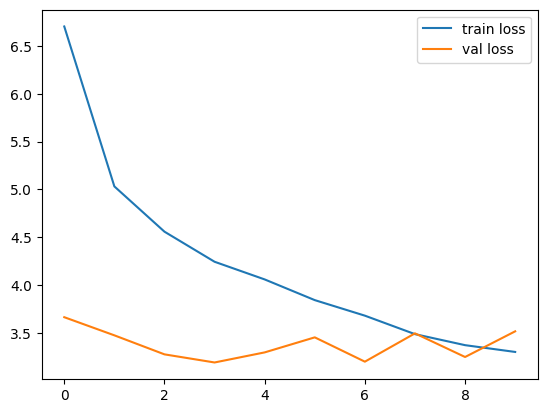

In [34]:
# Visualizing Train Loss vs Validation Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

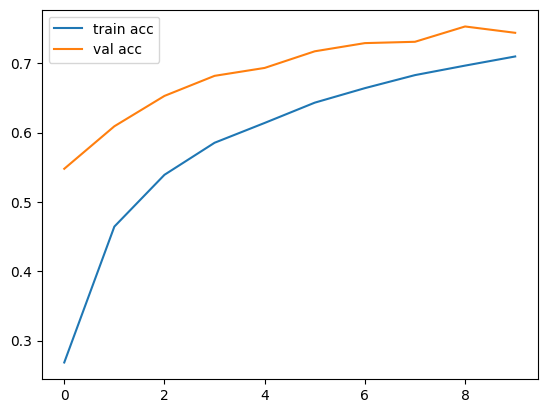

In [35]:
# Visualizing Train Accuracy vs Validation Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [36]:
# Augmentation for test dataset
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode =  'categorical')

Found 2625 images belonging to 525 classes.


In [37]:
# Evaluate model on test set
test_scores = model.evaluate(test_set)
print("Test Loss:", test_scores[0])
print("Test Accuracy:", test_scores[1])

83/83 [==============================] - 12s 147ms/step - loss: 2.8980 - accuracy: 0.7691
Test Loss: 2.897972822189331
Test Accuracy: 0.7691428661346436


In [38]:
# Saving the VGG model
model.save('Bird_VGG.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
# Loading the VGG model
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img,img_to_array

stateOfTheArt_model = load_model('/content/Bird_VGG.h5',compile=False)

In [40]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}

Displaying True labels vs Predicted labels

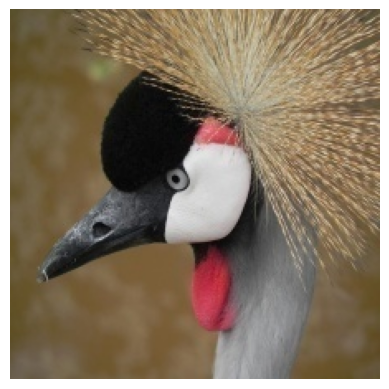

Actual Output: AFRICAN CROWNED CRANE
1/1 [==============================] - 1s 512ms/step
Predicted Output: AFRICAN CROWNED CRANE


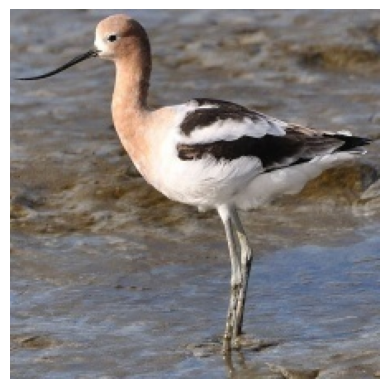

Actual Output: AMERICAN AVOCET
1/1 [==============================] - 0s 26ms/step
Predicted Output: AMERICAN AVOCET


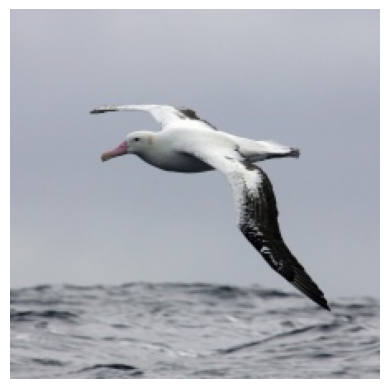

Actual Output: ALBATROSS
1/1 [==============================] - 0s 30ms/step
Predicted Output: ALBATROSS


In [41]:
# Function to display both predicted output and actual output 

def display_actual_and_predicted_output(image_path):
    # Load the image
    img = load_img(image_path, target_size=(224, 224, 3))

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Get the actual label from the image path
    actual_label = image_path.split('/')[-2]
    print("Actual Output:", actual_label)

    # Predict the label using the model
    img = load_img(image_path, target_size=(224, 224, 3))
    img = img_to_array(img)
    img = img / 255
    img = np.expand_dims(img, axis=0)
    predicted_output = stateOfTheArt_model.predict(img)
    predicted_label_index = np.argmax(predicted_output, axis=1)[0]
    predicted_label = lab[predicted_label_index]

    print("Predicted Output:", predicted_label)

# Example usage
image_paths = [
    '/data/test/AFRICAN CROWNED CRANE/1.jpg',
    '/data/test/AMERICAN AVOCET/1.jpg',
    '/data/test/ALBATROSS/1.jpg'
]

for image_path in image_paths:
    display_actual_and_predicted_output(image_path)